Importation des packages et modules

In [61]:
%matplotlib inline

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lecture du dataset en .csv avec Pandas, enregistré en DataFrame Pandas

In [63]:
data = pd.read_csv(r"Data\Raw\student-depression-dataset.csv")

Copie de travail du dataset

In [64]:
df = data.copy()

1. EDA (Exploratory Data Analysis)

Checklist de Base : 
Analyse de la forme :
- variable target : Depression
- lignes et colonnes : 27901 x 18
- types de variables : qualitatives : 8, quantitatives : 10
- analyse des valeurs manquantes : très peu de NaN et pas de ligne ie pas de lien explicit entre variables avec heatmap NaN

Analyse du fond :
- visualisation de la target : 59% en dépression
- signification des variables : 
- relation variables / target : 
    - target / demographic information : il semble que les personnes plus jeunes sont moins dépressives que les personnes plus âgées
    - target / academic performance : les personnes dépressives semblent être celles qui ont les volumes horaires les plus élevées, qui ressentent une pression académique élevée et qui ne sont pas satisfaites de leurs études.
    - target / lifestyle habits : il semble y a voir un lien entre le fait d'avoir un mauvais régime alimentaire et le fait d'être une personne dépressive
    - target / mental health history : il semble que les personnes stressées par l'argent soient plus dépressives, de même pour les pensées suicidaires

Affichage en entier des cellules

In [65]:
pd.set_option("display.max_row", 18)
pd.set_option("display.max_columns", 18)

Affichage des 5 premières lignes du DataFrame Pandas

In [66]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


Shape du DataFrame Pandas

In [67]:
df.shape

(27901, 18)

Size du DataFrame Pandas

In [68]:
df.size

502218

Types des éléments du DataFrame :

In [69]:
df.dtypes.value_counts()

object     8
float64    8
int64      2
Name: count, dtype: int64

Index du DataFrame Pandas

In [70]:
df.index

RangeIndex(start=0, stop=27901, step=1)

Colonnes du DataFrame Pandas

In [71]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

Affichage de tout le dataset et des NaN avec heatmap

<Axes: >

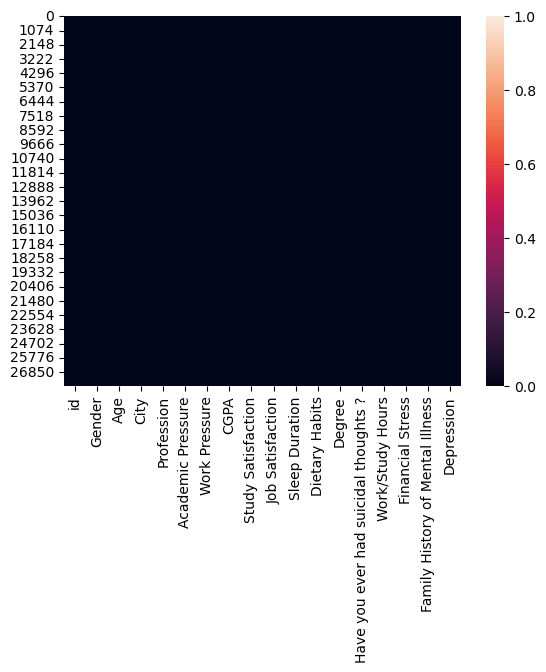

In [72]:
sns.heatmap(df.isna())

Comptage du nb de NaN dans le DataFrame

In [73]:
df.isna().sum(axis=0)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

Trouver NaN avec Boolean Mask

In [74]:
nan_indices = df[df["Financial Stress"].isna()].index
nan_indices

Index([4458, 13596, 19266], dtype='int64')

Examen de la target

In [75]:
y = df.loc[:, "Depression"]
y.value_counts(normalize=True)

Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64

Histogramme des variables continues

<Figure size 640x480 with 0 Axes>

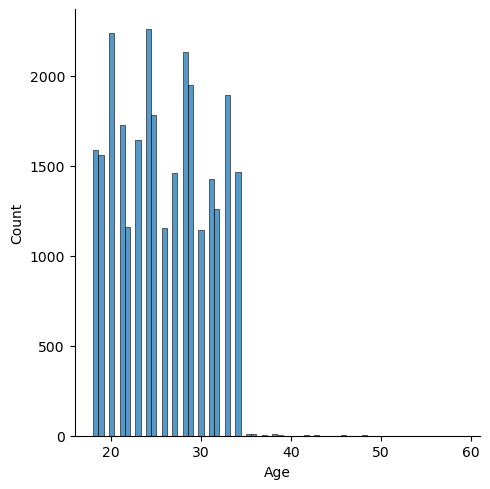

<Figure size 640x480 with 0 Axes>

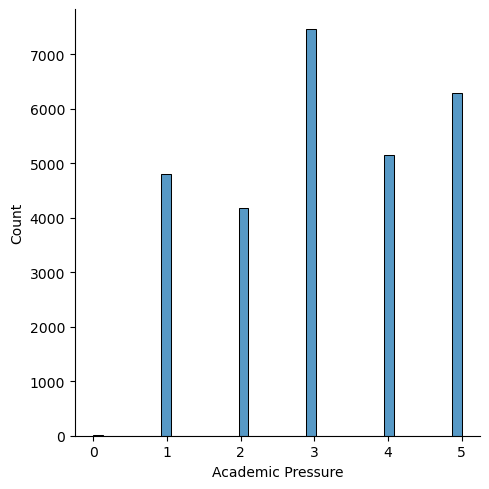

<Figure size 640x480 with 0 Axes>

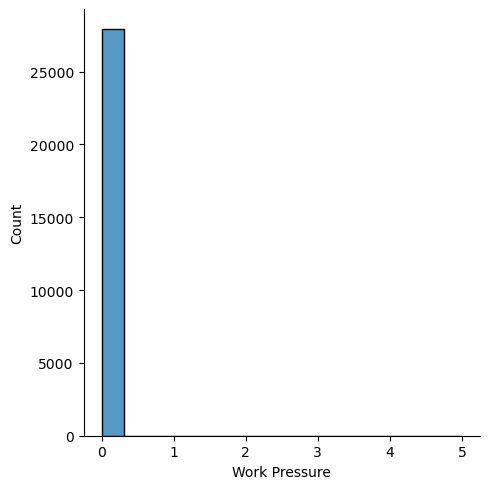

<Figure size 640x480 with 0 Axes>

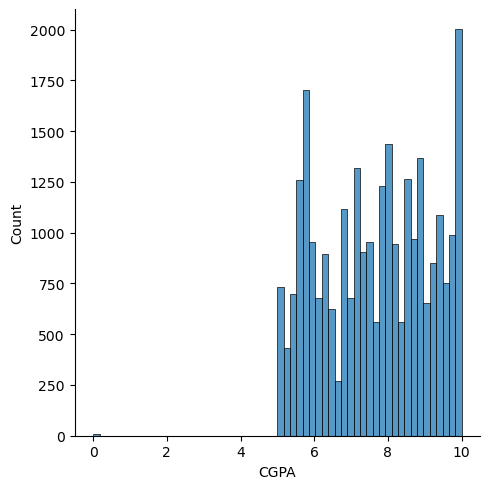

<Figure size 640x480 with 0 Axes>

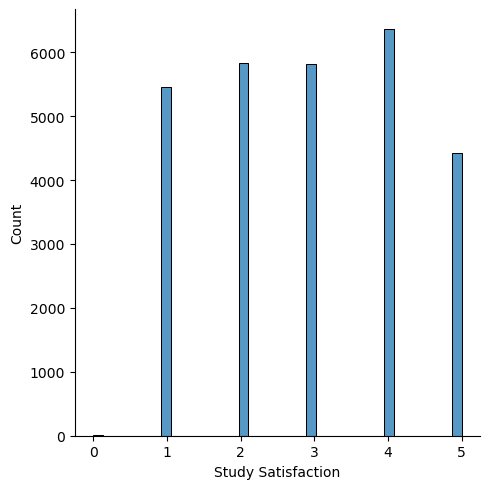

<Figure size 640x480 with 0 Axes>

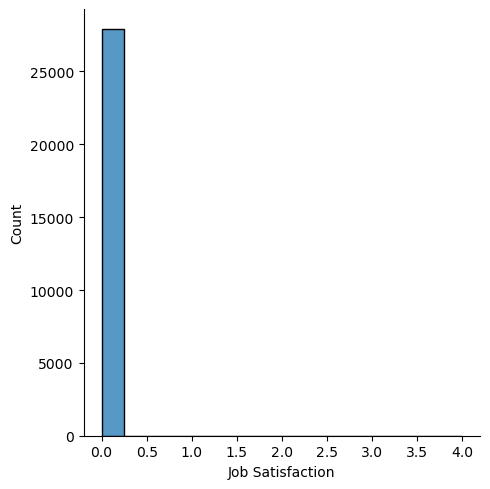

<Figure size 640x480 with 0 Axes>

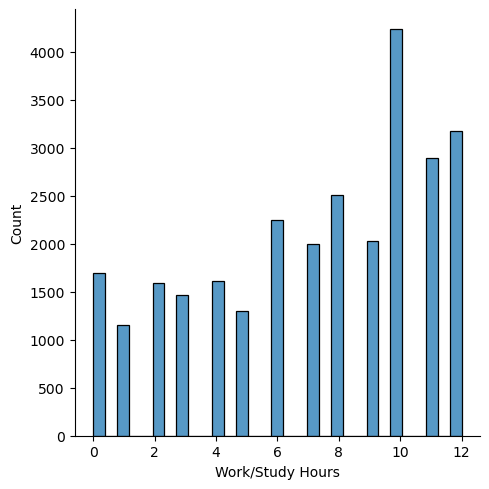

<Figure size 640x480 with 0 Axes>

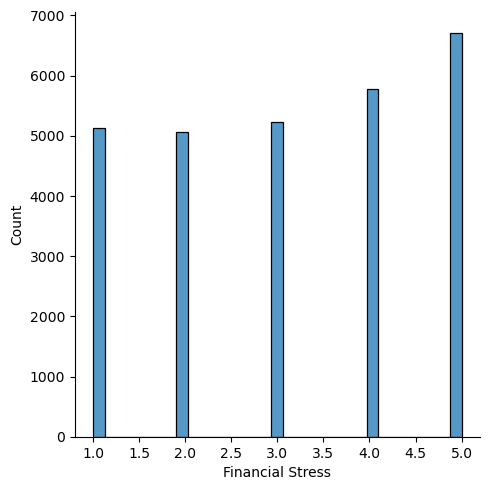

In [76]:
for col in df.select_dtypes("float"):
    plt.figure()
    sns.displot(df.loc[:, col])

Dictionnaires des variables catégorielles et nombre d'occurences

In [77]:
# Sélectionner les colonnes catégorielles
categorical_features = df.select_dtypes(include=["object"]).columns

# Dictionnaire pour stocker les occurrences des catégories pour chaque variable catégorielle
category_occurrences = {}

# Pour chaque colonne catégorielle
for feature in categorical_features:
    # Compter les occurrences de chaque valeur dans la colonne
    occurrences = df[feature].value_counts().to_dict()
    # Ajouter le résultat au dictionnaire global
    category_occurrences[feature] = occurrences
    # Afficher le dictionnaire des occurrences pour chaque colonne
    print(f"{feature} : {occurrences}")

Gender : {'Male': 15547, 'Female': 12354}
City : {'Kalyan': 1570, 'Srinagar': 1372, 'Hyderabad': 1340, 'Vasai-Virar': 1290, 'Lucknow': 1155, 'Thane': 1139, 'Ludhiana': 1111, 'Agra': 1094, 'Surat': 1078, 'Kolkata': 1066, 'Jaipur': 1036, 'Patna': 1007, 'Visakhapatnam': 969, 'Pune': 968, 'Ahmedabad': 951, 'Bhopal': 934, 'Chennai': 885, 'Meerut': 825, 'Rajkot': 816, 'Delhi': 768, 'Bangalore': 767, 'Ghaziabad': 745, 'Mumbai': 699, 'Vadodara': 694, 'Varanasi': 685, 'Nagpur': 651, 'Indore': 643, 'Kanpur': 609, 'Nashik': 547, 'Faridabad': 461, 'Saanvi': 2, 'Bhavna': 2, 'City': 2, 'Harsha': 2, 'Kibara': 1, 'Nandini': 1, 'Nalini': 1, 'Mihir': 1, 'Nalyan': 1, 'M.Com': 1, 'ME': 1, 'Rashi': 1, 'Gaurav': 1, 'Reyansh': 1, 'Harsh': 1, 'Vaanya': 1, 'Mira': 1, 'Less than 5 Kalyan': 1, '3.0': 1, 'Less Delhi': 1, 'M.Tech': 1, 'Khaziabad': 1}
Profession : {'Student': 27870, 'Architect': 8, 'Teacher': 6, 'Digital Marketer': 3, 'Content Writer': 2, 'Chef': 2, 'Doctor': 2, 'Pharmacist': 2, 'Civil Engineer': 1

Relation Target / Variables

Création de sous-ensembles dépressifs et non-dépressifs

In [78]:
depressed_df = df[df.loc[:, "Depression"] == 1]

In [79]:
non_depressed_df = df[df.loc[:, "Depression"] == 0]

Création des ensembles Demographic Information, Academic Performance, Lifestyle habits, Mental Health history

In [80]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [81]:
demographic_information_columns = ["Gender", "Age", "City"]

In [82]:
academic_performance_columns = [
    "Profession",
    "Academic Pressure",
    "Work Pressure",
    "CGPA",
    "Study Satisfaction",
    "Job Satisfaction",
    "Degree",
    "Work/Study Hours",
]

In [83]:
lifestyle_habits_columns = ["Sleep Duration", "Dietary Habits"]

In [84]:
mental_health_history_columns = [
    "Have you ever had suicidal thoughts ?",
    "Financial Stress",
    "Family History of Mental Illness",
]

Target / Demographic Information

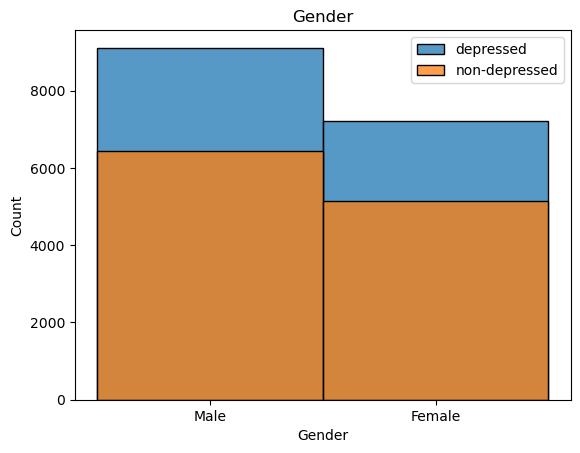

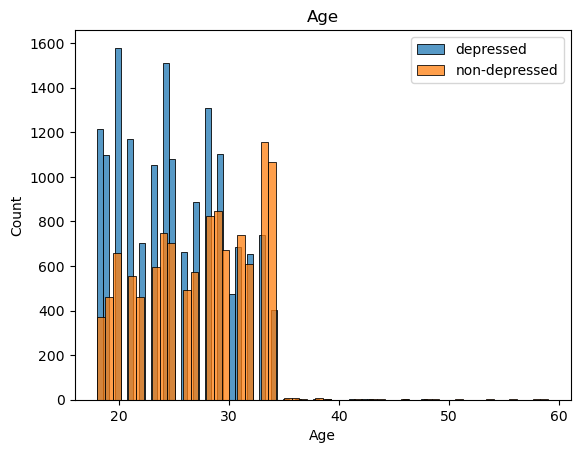

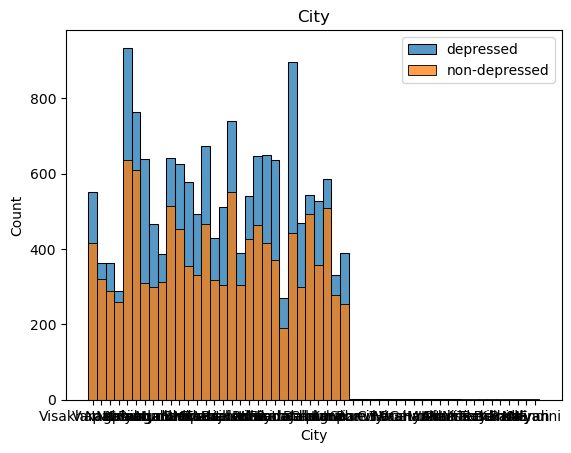

In [85]:
for col in demographic_information_columns:
    plt.figure()
    sns.histplot(depressed_df.loc[:, col], label="depressed")
    sns.histplot(non_depressed_df.loc[:, col], label="non-depressed")
    plt.title(f"{col}")
    plt.legend()

Relation Target / Academic Performance

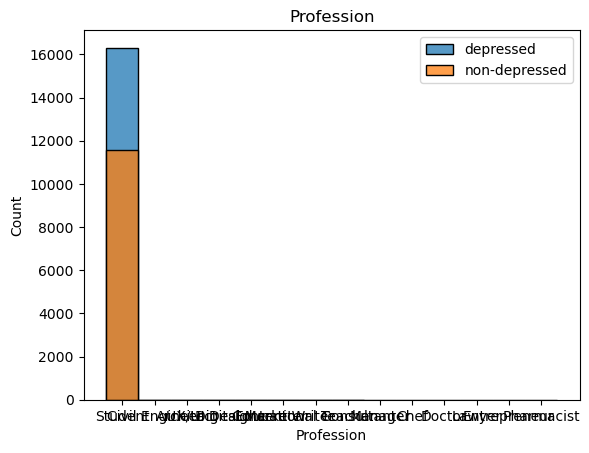

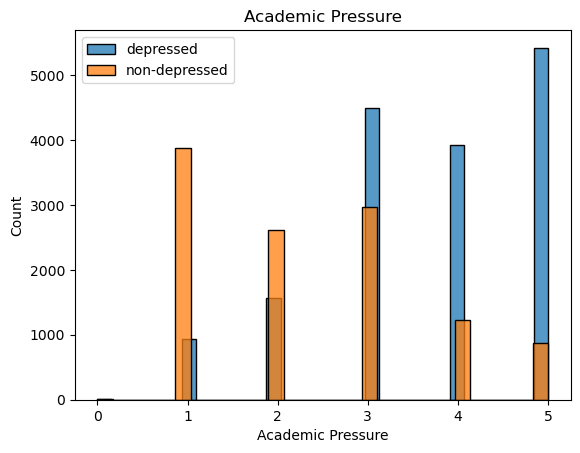

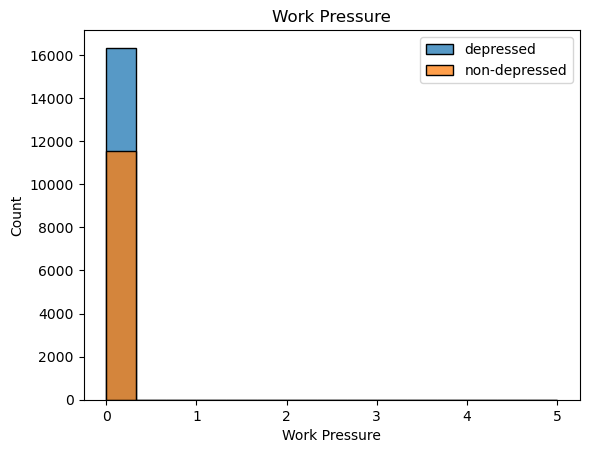

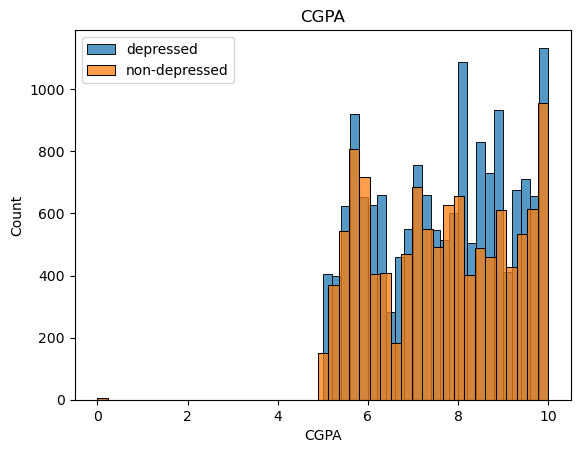

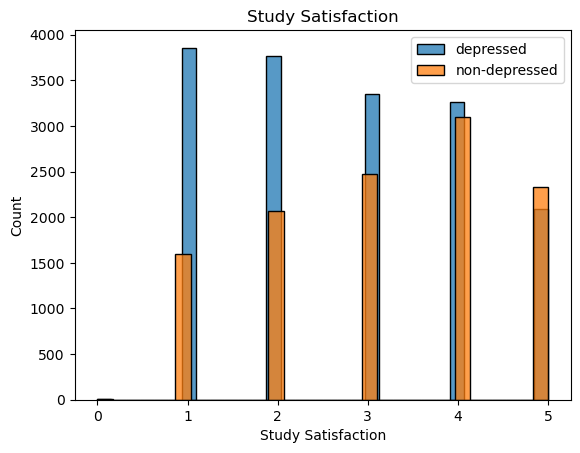

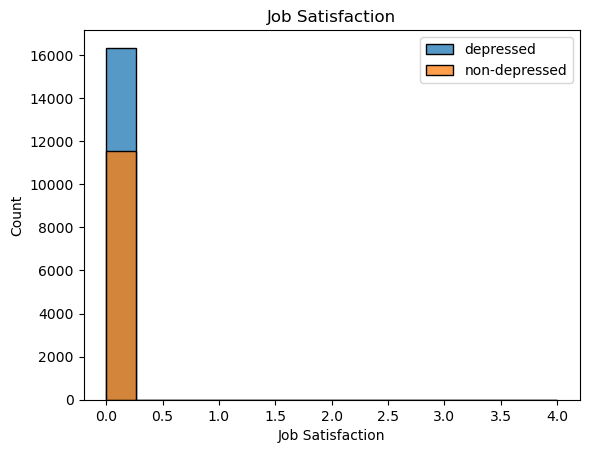

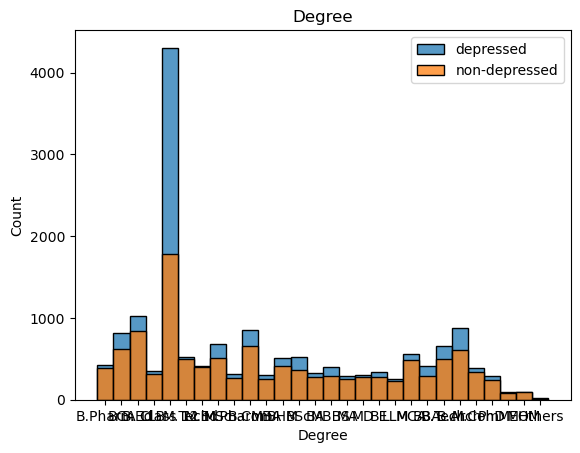

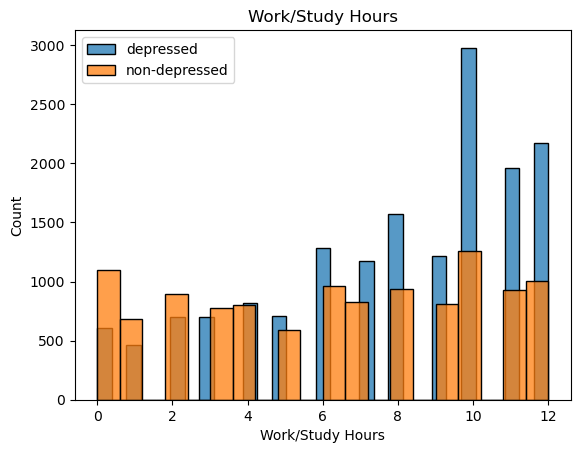

In [86]:
for col in academic_performance_columns:
    plt.figure()
    sns.histplot(depressed_df.loc[:, col], label="depressed")
    sns.histplot(non_depressed_df.loc[:, col], label="non-depressed")
    plt.title(f"{col}")
    plt.legend()

On voit que "Profession", "Work pressure" et "Job Satisfaction" sont des features que l'on peut supprimer

Relation Target / Lifestyle Habits

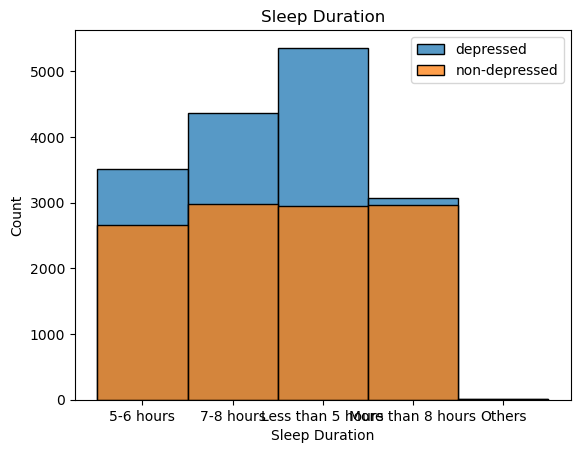

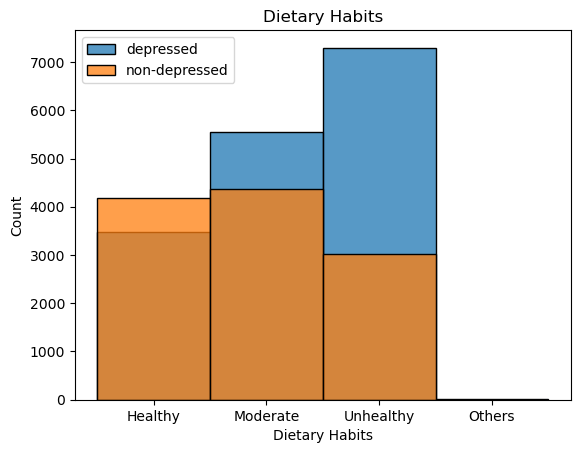

In [87]:
for col in lifestyle_habits_columns:
    plt.figure()
    sns.histplot(depressed_df.loc[:, col], label="depressed")
    sns.histplot(non_depressed_df.loc[:, col], label="non-depressed")
    plt.title(f"{col}")
    plt.legend()

Relation Target / Mental Health History

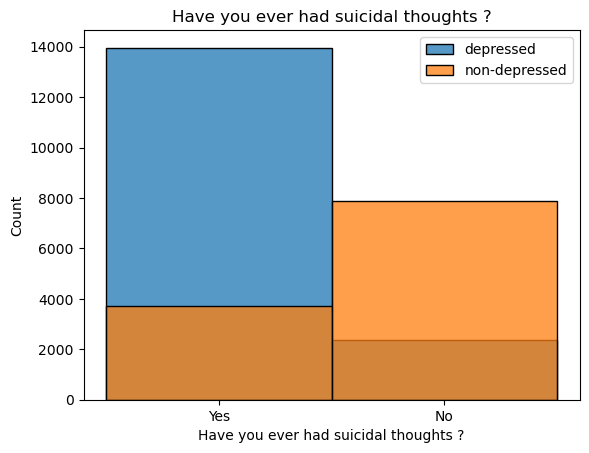

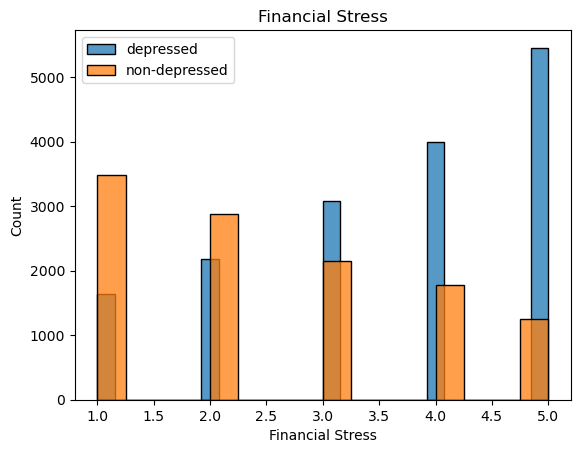

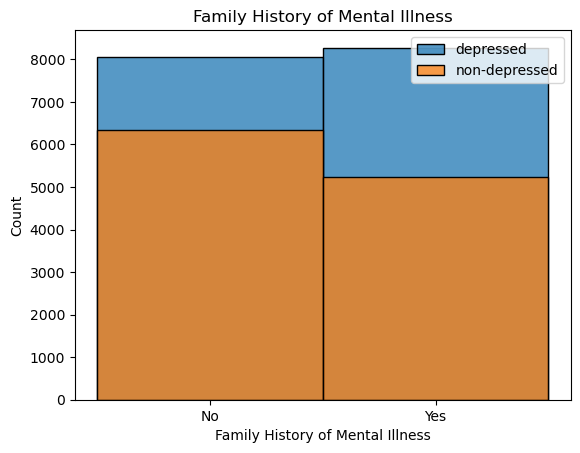

In [88]:
for col in mental_health_history_columns:
    plt.figure()
    sns.histplot(depressed_df.loc[:, col], label="depressed")
    sns.histplot(non_depressed_df.loc[:, col], label="non-depressed")
    plt.title(f"{col}")
    plt.legend()

Analyse détaillée Relations Variable / Variable (pas très utile ici car pas bcp de var quantitatives)

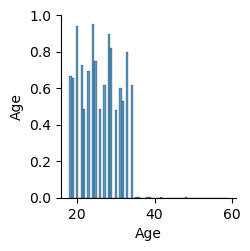

In [89]:
sns.pairplot(df.loc[:, demographic_information_columns])

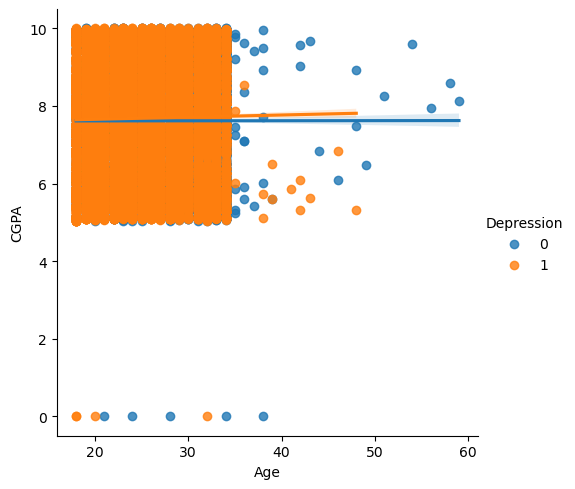

In [90]:
sns.lmplot(x="Age", y="CGPA", hue="Depression", data=df)

2. PREPROCESSING

In [91]:
df = data.copy()

Supprimer toutes les lignes contenant au moins un NaN

In [92]:
df_nona = df.dropna()

In [93]:
df_nona.shape

(27898, 18)

In [94]:
df_nona.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


Suppression des entrées associées à des valeurs uniques ou négligeables de variable catégorielle

In [95]:
# on filtre la colonne "Profession" pour garder seulement "Student"
df_cat_filtered = df_nona[df_nona["Profession"] == "Student"]

# on filtre la colonne "City" pour garder les villes ayant plus de 10 occurrences
city_counts = df_cat_filtered["City"].value_counts()
cities_to_keep = city_counts[city_counts >= 10].index
df_cat_filtered = df_cat_filtered[df_cat_filtered["City"].isin(cities_to_keep)]

# on filtre la colonne "Sleep Duration" pour enlever "Others"
df_cat_filtered = df_cat_filtered[df_cat_filtered["Sleep Duration"] != "Others"]

# on filtre la colonne "Dietary Habits" pour enlever "Others"
df_cat_filtered = df_cat_filtered[df_cat_filtered["Dietary Habits"] != "Others"]

# on filtre la colonne "Degree" pour enlever "Others"
df_cat_filtered = df_cat_filtered[df_cat_filtered["Degree"] != "Others"]

print(f"Nombre d'entrées après filtrage: {df_cat_filtered.shape[0]}")

Nombre d'entrées après filtrage: 27776


Suppression Feature "Profession" car constante "Student" sur toutes les entrées

In [96]:
df_cat_filtered = df_cat_filtered.drop("Profession", axis=1)

Vérification constante ou tendance marquée pour variables numériques (intuition : "Job Satisfaction" constante égale à 0 car uniquement des étudiants restants dans le DataFrame suite au filtrage)

In [97]:
# Sélectionner les colonnes catégorielles
numerical_features = df_cat_filtered.select_dtypes(include=np.number).columns

# Dictionnaire pour stocker les occurrences des catégories pour chaque variable catégorielle
category_occurrences = {}

# Pour chaque colonne catégorielle
for feature in numerical_features:
    # Compter les occurrences de chaque valeur dans la colonne
    occurrences = df_cat_filtered[feature].value_counts().to_dict()
    # Ajouter le résultat au dictionnaire global
    category_occurrences[feature] = occurrences
    # Afficher le dictionnaire des occurrences pour chaque colonne
    print(f"{feature} : {occurrences}")

id : {2: 1, 94223: 1, 94276: 1, 94275: 1, 94272: 1, 94270: 1, 94256: 1, 94236: 1, 94235: 1, 94234: 1, 94231: 1, 94230: 1, 94227: 1, 94219: 1, 94448: 1, 94204: 1, 94202: 1, 94197: 1, 94192: 1, 94184: 1, 94183: 1, 94174: 1, 94173: 1, 94172: 1, 94165: 1, 94162: 1, 94280: 1, 94289: 1, 94292: 1, 94304: 1, 94435: 1, 94429: 1, 94427: 1, 94425: 1, 94420: 1, 94407: 1, 94400: 1, 94397: 1, 94396: 1, 94393: 1, 94386: 1, 94373: 1, 94370: 1, 94369: 1, 94362: 1, 94358: 1, 94354: 1, 94351: 1, 94347: 1, 94325: 1, 94320: 1, 94312: 1, 94307: 1, 94156: 1, 94147: 1, 94133: 1, 93988: 1, 93985: 1, 93983: 1, 93975: 1, 93969: 1, 93962: 1, 93954: 1, 93946: 1, 93936: 1, 93934: 1, 93931: 1, 93930: 1, 93922: 1, 93916: 1, 93915: 1, 93912: 1, 93909: 1, 93906: 1, 93901: 1, 93899: 1, 93898: 1, 93871: 1, 93868: 1, 93862: 1, 93986: 1, 93996: 1, 94131: 1, 94001: 1, 94128: 1, 94121: 1, 94118: 1, 94116: 1, 94113: 1, 94111: 1, 94100: 1, 94093: 1, 94079: 1, 94077: 1, 94073: 1, 94071: 1, 94061: 1, 94060: 1, 94056: 1, 94050: 1

Ce qui attire l'attention : les variables où il y a des valeurs très minoritaires : "Work Pressure" valeurs égale à 5.0 et 2.0 car que des étudiants, idem pour "Job Satisfaction". "Academic Pressure" où valeur égale à 0.0 et idem pour "Study Satisfaction". On va donc regarder les entrées associées en détail avant de filtrer.

In [98]:
work_pressure_non_zero = df_cat_filtered[df_cat_filtered["Work Pressure"] != 0.0]
job_satisfaction_non_zero = df_cat_filtered[df_cat_filtered["Job Satisfaction"] != 0.0]
academic_pressure_zero = df_cat_filtered[df_cat_filtered["Academic Pressure"] == 0.0]
study_satisfaction_zero = df_cat_filtered[df_cat_filtered["Study Satisfaction"] == 0.0]

print("Entrées où 'Work Pressure' est non égal à 0.0:")


print(work_pressure_non_zero)

print("\nEntrées où 'Job Satisfaction' est non égal à 0.0:")


print(job_satisfaction_non_zero)

print("\nEntrées où 'Academic Pressure' est égal à 0.0:")


print(academic_pressure_zero)

print("\nEntrées où 'Study Satisfaction' est égal à 0.0:")


print(study_satisfaction_zero)

Entrées où 'Work Pressure' est non égal à 0.0:
           id Gender   Age     City  Academic Pressure  Work Pressure  CGPA  \
4365    21880   Male  38.0  Chennai                0.0            5.0   0.0   
14855   75007   Male  21.0  Lucknow                0.0            2.0   0.0   
25746  129756   Male  18.0   Rajkot                0.0            5.0   0.0   

       Study Satisfaction  Job Satisfaction Sleep Duration Dietary Habits  \
4365                  0.0               4.0      5-6 hours        Healthy   
14855                 0.0               1.0      7-8 hours       Moderate   
25746                 0.0               4.0      7-8 hours       Moderate   

         Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
4365   Class 12                                    No               2.0   
14855  Class 12                                   Yes               3.0   
25746  Class 12                                   Yes               9.0   

       Financial Stress Fa

On observe que certaines entrées sont présentes dans les 4 tableaux. De plus toutes les autres anomalies sont sur des questions standardisées où il y a un gros écart de nombre d'occurrences avec les autres réponses possibles => réponse très minoritaire

In [99]:
# on filtre la colonne "Work Pressure" pour garder les valeurs égales à 0.0
df_filtered = df_cat_filtered[df_cat_filtered["Work Pressure"] == 0.0]
# on supprime la colonne puisqu'elle est maintenant constante
df_filtered = df_filtered.drop("Work Pressure", axis=1)

# on filtre la colonne "Job Satisfaction" pour garder les valeurs égales à 0.0
df_filtered = df_filtered[df_filtered["Job Satisfaction"] == 0.0]
# on supprime la colonne puisqu'elle est maintenant constante
df_filtered = df_filtered.drop("Job Satisfaction", axis=1)

# on filtre la colonne "Academic Pressure" pour garder les valeurs non égales à 0.0
df_filtered = df_filtered[df_filtered["Academic Pressure"] != 0.0]

# on filtre la colonne "Study Satisfaction" pour garder les valeurs non égales à 0.0
df_filtered = df_filtered[df_filtered["Study Satisfaction"] != 0.0]

print(
    f"Nombre d'entrées après filtrage pour les variables numériques: {df_filtered.shape[0]}"
)

Nombre d'entrées après filtrage pour les variables numériques: 27762


Distinction X (features) et y (target/label)

In [100]:
X = df_filtered.drop("Depression", axis=1)
y = df_filtered.loc[:, "Depression"]

Encodage variables catégorielles OneHotEncoder

In [101]:
from sklearn.compose import make_column_selector

categorical_features = make_column_selector(
    dtype_include=object
)  # on selectionne les colonnes de type string/objet
cat_columns = categorical_features(X)  # on récupère les noms des colonnes catégorielles

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

encoded_cat = encoder.fit_transform(X[cat_columns])

encoded_cat_df = pd.DataFrame(
    encoded_cat, columns=encoder.get_feature_names_out(), index=X.index
)

# on supprime les anciennes colonnes catégorielles et on concatene les nouvelles
X_onehot_encoded = X.drop(columns=cat_columns)
X_onehot_encoded = pd.concat([X_onehot_encoded, encoded_cat_df], axis=1)

X_onehot_encoded.head()

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Gender_Female,Gender_Male,...,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_PhD,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,2,33.0,5.0,8.97,2.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,8,24.0,2.0,5.90,5.0,3.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26,31.0,3.0,7.03,5.0,9.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,30,28.0,3.0,5.59,2.0,4.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,32,25.0,4.0,8.13,3.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Train Test Split

In [102]:
from sklearn.model_selection import train_test_split

# on fait un split pour l'encodage onehot car c'est celui qu'on utilisera ensuite



X_train, X_test, y_train, y_test = train_test_split(X_onehot_encoded, y, test_size=0.2)

3. Modélisation : premier modèle rapide, Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier



model1 = DecisionTreeClassifier(random_state=0)


# random_state tres important car garantit que l'on va évaluer les différents modèles de la même façon par rapport à l'aléatoire

Procédure d'évaluation

In [104]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
# f1_score permet de déterminer faux-positifs, faux-négatifs, etc
from sklearn.model_selection import learning_curve
# permet de comprendre si le modele est en overfitting ou en underfitting

def affichage_learning_curve(model, X_train, y_train):
    N, train_score, val_score = learning_curve(
        model, X_train, y_train, cv=4, scoring="f1", train_sizes=np.linspace(0.1, 1, 10)
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(N, train_score.mean(axis=1), label="train score")
    ax.plot(N, val_score.mean(axis=1), label="validation score")
    ax.legend()
    return fig


def evaluation(name, model):

    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    fig = affichage_learning_curve(model, X_train, y_train)
    fig.savefig(f"figures/learning_curve_" + name + ".png")

    return ypred

[[1633  627]
 [ 630 2663]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2260
           1       0.81      0.81      0.81      3293

    accuracy                           0.77      5553
   macro avg       0.77      0.77      0.77      5553
weighted avg       0.77      0.77      0.77      5553



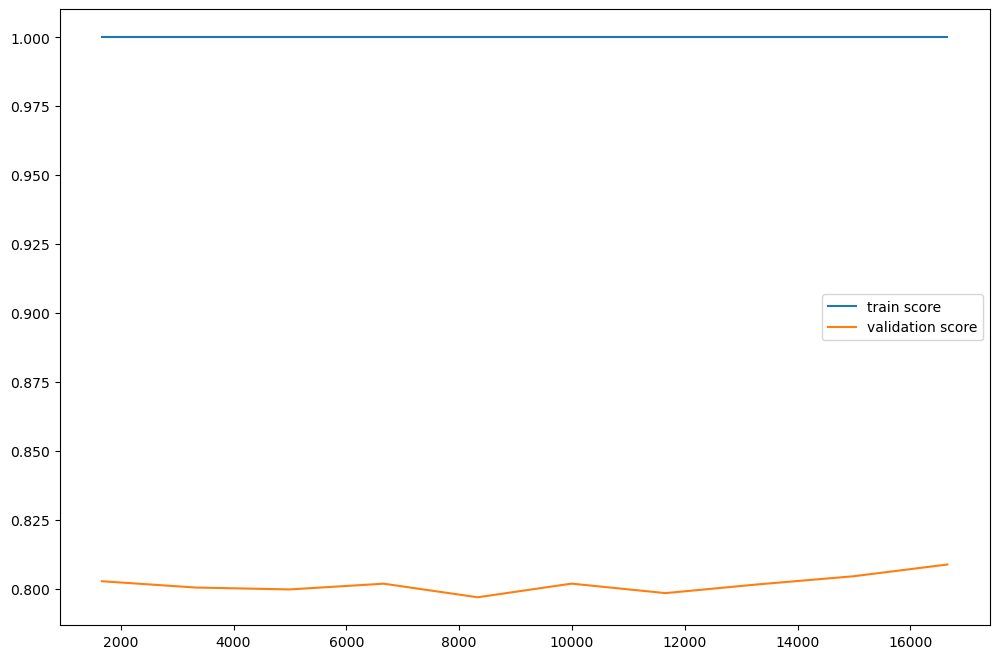

In [105]:
ypred_model1_DecisionTree = evaluation("DecisionTreeClassifier", model1)

recall : On a réussi à identifier 80% des personnes en dépression, pas trop mal avant tout preprocessing
<br>Courbe : bons résultats sur validation score mais train score constant à 1.00 indique un overfitting

Changement de modèle pour éviter Overfitting : RandomForest

[[1774  486]
 [ 384 2909]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2260
           1       0.86      0.88      0.87      3293

    accuracy                           0.84      5553
   macro avg       0.84      0.83      0.84      5553
weighted avg       0.84      0.84      0.84      5553



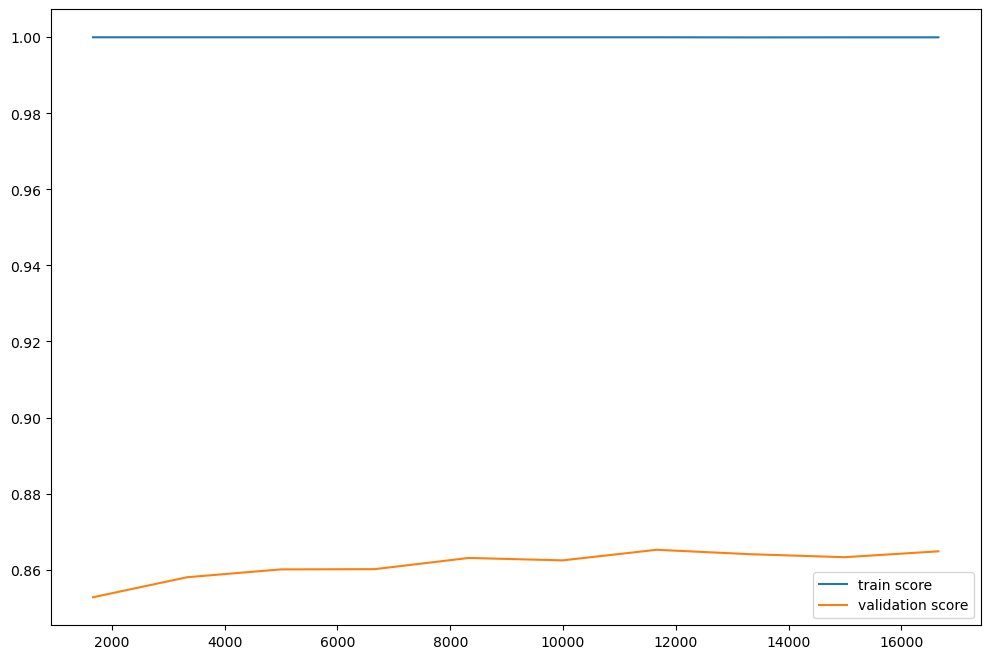

In [106]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=0)
ypred_model2_RandomForest = evaluation("RandomForestClassifier", model2)

Feature Selection avec Pipeline et ANOVA

In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# f_classif est un test ANOVA

model3 = make_pipeline(SelectKBest(f_classif), RandomForestClassifier(random_state=0))

# dictionnaire de paramètres
params = {
    "selectkbest__k": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
}


grid = GridSearchCV(model3, param_grid=params, cv=4, n_jobs=-1)
# 4 splits pour crossvalidation

grid.fit(X_train, y_train)
grid.best_params_

{'selectkbest__k': 14}

Il y a déjà 13 features donc sélection de variables inutiles

Création d'un dictionnaire de modèles à évaluer

In [108]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

preprocessor = make_pipeline(PolynomialFeatures(2))
# on aurait mis le SelectKBest à la suite s'il avait été pertinent

RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
# pas besoin de normalisation car basé sur arbre de décision
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
# idem
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
# nécessite normalisation
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
# idem

########################### NE PAS RUN CA PREND LONGTEMPS ########################### 

RandomForest
[[1828  472]
 [ 394 2859]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2300
           1       0.86      0.88      0.87      3253

    accuracy                           0.84      5553
   macro avg       0.84      0.84      0.84      5553
weighted avg       0.84      0.84      0.84      5553

AdaBoost


c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[1843  457]
 [ 406 2847]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2300
           1       0.86      0.88      0.87      3253

    accuracy                           0.84      5553
   macro avg       0.84      0.84      0.84      5553
weighted avg       0.84      0.84      0.84      5553



c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm t

SVM
[[1776  524]
 [ 420 2833]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2300
           1       0.84      0.87      0.86      3253

    accuracy                           0.83      5553
   macro avg       0.83      0.82      0.82      5553
weighted avg       0.83      0.83      0.83      5553

KNN
[[1275 1025]
 [ 599 2654]]
              precision    recall  f1-score   support

           0       0.68      0.55      0.61      2300
           1       0.72      0.82      0.77      3253

    accuracy                           0.71      5553
   macro avg       0.70      0.69      0.69      5553
weighted avg       0.70      0.71      0.70      5553



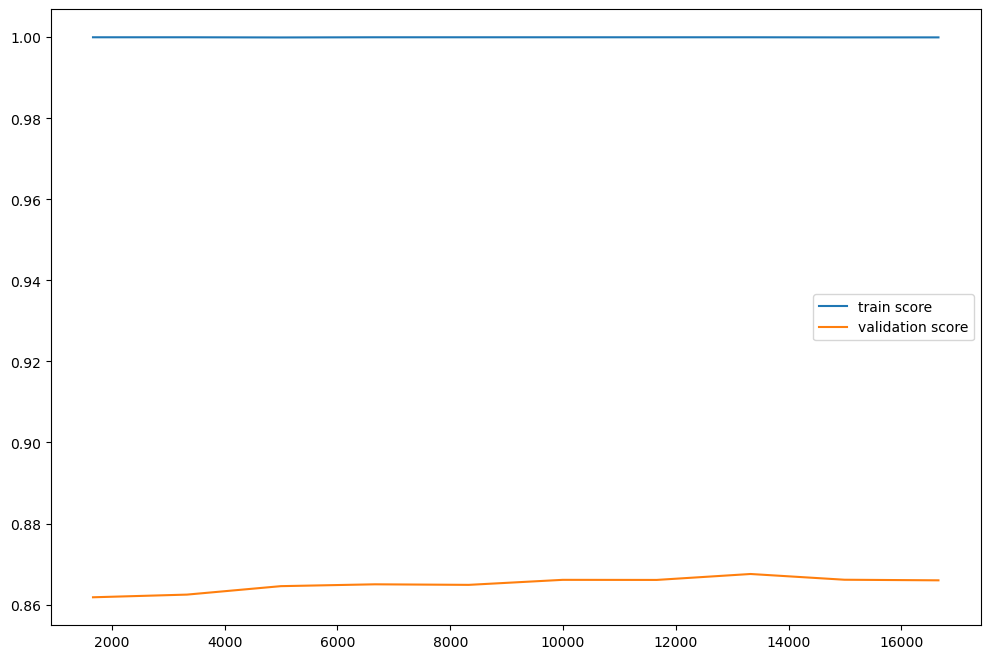

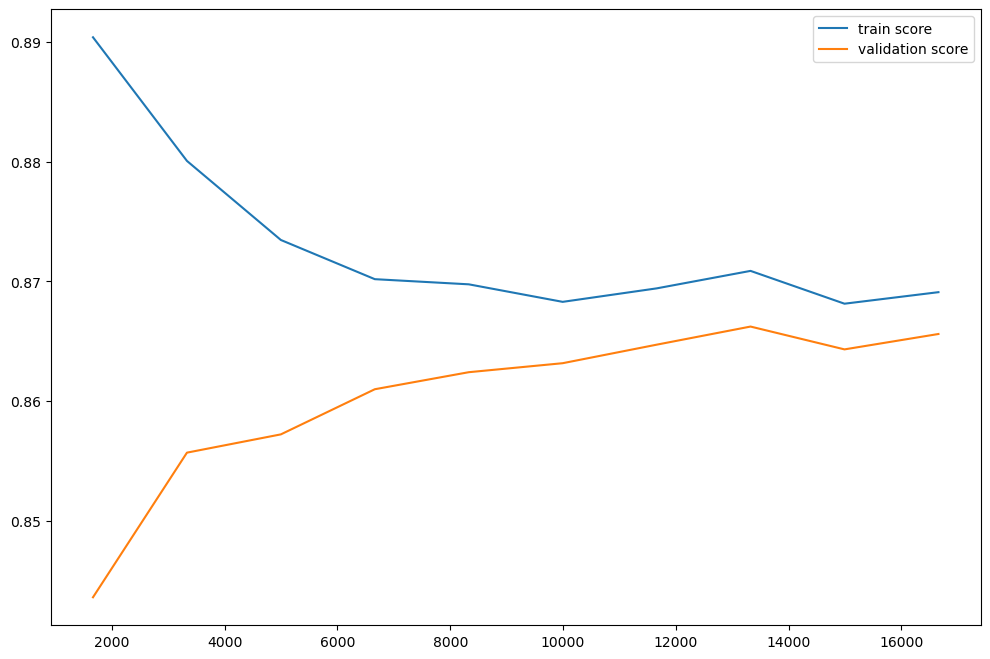

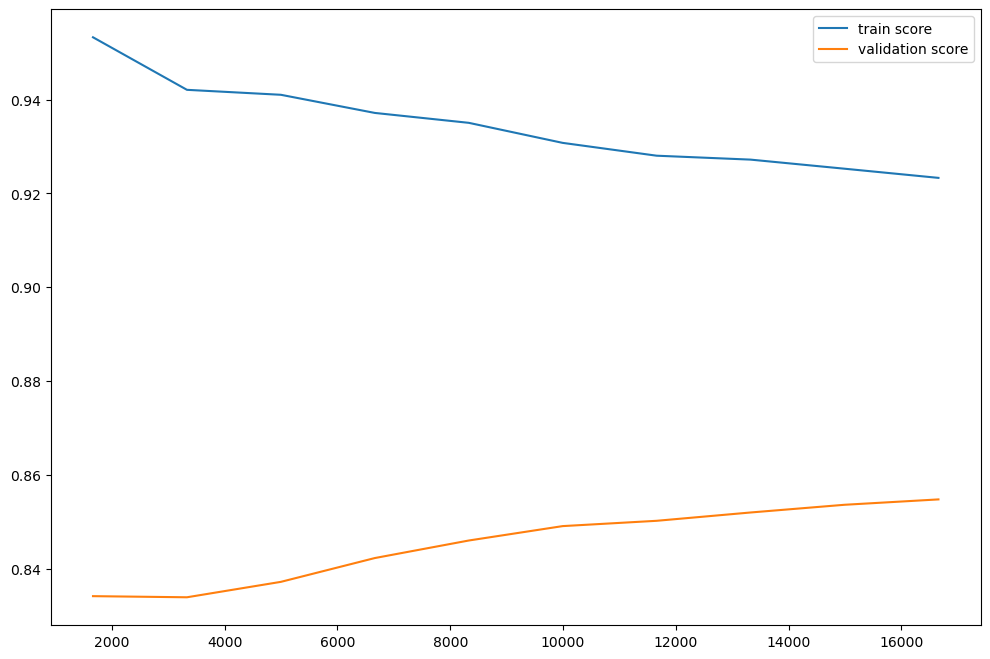

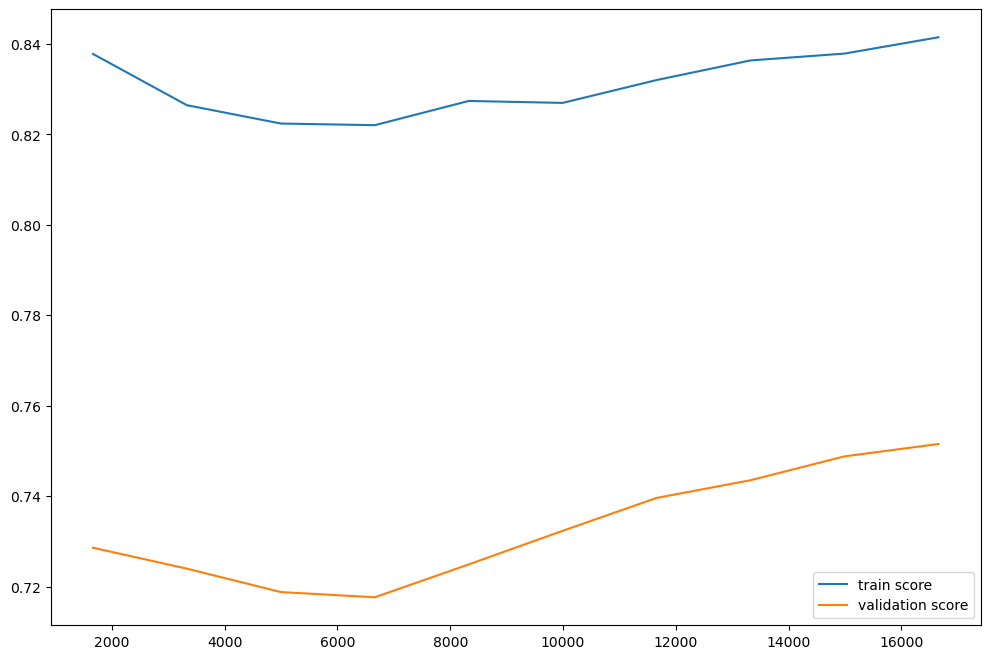

In [ ]:
ypred_RandomForest= evaluation("RandomForest", RandomForest)
ypred_AdaBoost= evaluation("AdaBoost", AdaBoost)
ypred_SVM= evaluation("SVM", SVM)
ypred_KNN= evaluation("KNN", KNN)

On voit sur les plots que le AdaBoost et le SVM ne sont pas en overfitting et que les deux courbes se rapprochent dans les deux cas tout en restant plutot hautes. Le rapprochement plus marqué avec l'AdaBoost qu'avec le SVM donc c'est ce modèle que l'on va chercher à optimiser par la suite.

Optimisation

In [109]:
from sklearn.model_selection import GridSearchCV
AdaBoost

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures())])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))])

On regarde la documentation de l'AdaBoostClassifier pour faire notre dictionnaire d'hyperparamètres à optimiser.

########################### NE PAS RUN CA PREND MILLE ANS ########################### 

In [57]:
hyper_params = {
    "adaboostclassifier__n_estimators": [
        10,
        50,
        100,
        200,
    ],  # Nombre d'estimateurs faibles (arbres de décision)
    "adaboostclassifier__learning_rate": [0.001, 0.1, 1],  # Taux d'apprentissage
    "adaboostclassifier__algorithm": [
        "SAMME",
        "SAMME.R",
    ],  # Algorithme de mise à jour des poids
    "adaboostclassifier__estimator": [
        DecisionTreeClassifier(max_depth=d) for d in [1, 2, 3, 4, 5]
    ],  # Profondeur de l'arbre
}

grid = GridSearchCV(AdaBoost, hyper_params, scoring="recall", cv=3, n_jobs=-1)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'adaboostclassifier__algorithm': 'SAMME.R', 'adaboostclassifier__estimator': DecisionTreeClassifier(max_depth=3), 'adaboostclassifier__learning_rate': 0.001, 'adaboostclassifier__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      2300
           1       0.81      0.90      0.85      3253

    accuracy                           0.82      5553
   macro avg       0.82      0.80      0.81      5553
weighted avg       0.82      0.82      0.82      5553



RandomizedSearchCV pour aller plus vite

########################### NE PAS RUN C'EST LONG ########################### 

In [58]:
from sklearn.model_selection import RandomizedSearchCV

hyper_params = {
    "n_estimators": [
        10,
        50,
        100,
        200,
    ],  # Nombre d'estimateurs faibles (arbres de décision)
    "learning_rate": [0.001, 0.1, 1],  # Taux d'apprentissage
    "algorithm": [
        "SAMME",
        "SAMME.R",
    ],  # Algorithme de mise à jour des poids
    "estimator": [
        DecisionTreeClassifier(max_depth=d) for d in [1, 2, 3, 4, 5]
    ],  # Profondeur de l'arbre
}

random_search = RandomizedSearchCV(
    estimator=AdaBoostClassifier(),
    param_distributions=hyper_params,  # Même dictionnaire d'hyperparamètres
    scoring="recall",
    cv=3,
    n_jobs=-1,
    n_iter=100,  # Nombre d'itérations (réduit fortement le temps)
    random_state=0,  # Assure la reproductibilité
)

random_search.fit(X_train, y_train)

print(random_search.best_params_)

y_pred = random_search.predict(X_test)

print(classification_report(y_test, y_pred))

c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'n_estimators': 100, 'learning_rate': 0.001, 'estimator': DecisionTreeClassifier(max_depth=2), 'algorithm': 'SAMME.R'}
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      2300
           1       0.75      0.93      0.83      3253

    accuracy                           0.78      5553
   macro avg       0.80      0.75      0.75      5553
weighted avg       0.79      0.78      0.77      5553



Meilleurs modèles trouvés

In [110]:
model_randomizedsearch = make_pipeline(preprocessor, AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, learning_rate=0.001, algorithm="SAMME.R",random_state=0))

########################### NE PAS RUN C'EST LONG ########################### 

Learning Curve AdaBoost RandomizedSearchCV

c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[1635  625]
 [ 384 2909]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2260
           1       0.82      0.88      0.85      3293

    accuracy                           0.82      5553
   macro avg       0.82      0.80      0.81      5553
weighted avg       0.82      0.82      0.82      5553



c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm t

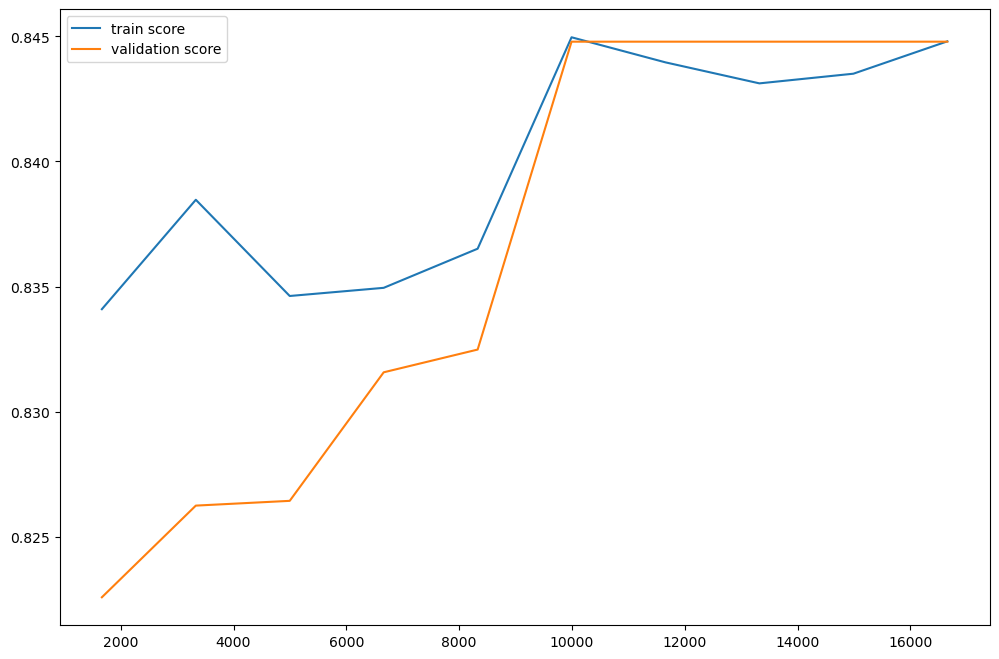

In [111]:
ypred_AdaBoost_RandomizedSearchCV = evaluation("AdaBoost_RandomizedSearch",model_randomizedsearch)

In [112]:
model_gridsearch = make_pipeline(preprocessor, AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, learning_rate=0.001, algorithm="SAMME.R",random_state=0))

########################### NE PAS RUN C'EST LONG ########################### 

Learning Curve AdaBoost GridSearchCV

c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[1542  718]
 [ 277 3016]]
              precision    recall  f1-score   support

           0       0.85      0.68      0.76      2260
           1       0.81      0.92      0.86      3293

    accuracy                           0.82      5553
   macro avg       0.83      0.80      0.81      5553
weighted avg       0.82      0.82      0.82      5553



c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DataTrek\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm t

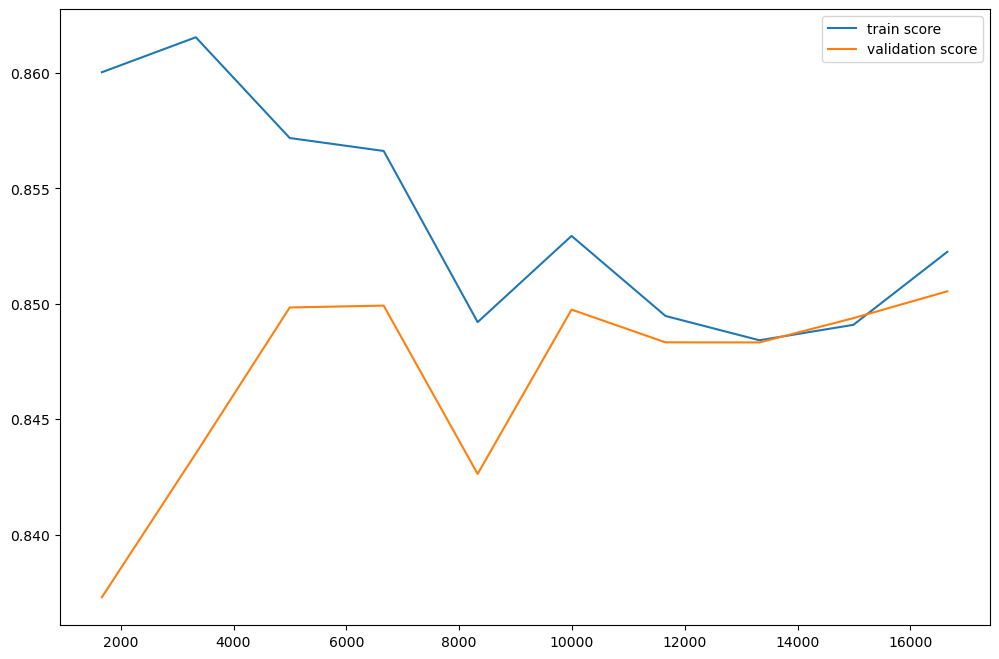

In [113]:
ypred_AdaBoost_GridSearchCV = evaluation("AdaBoost_GridSearch", model_gridsearch)

Precision Recal Curve

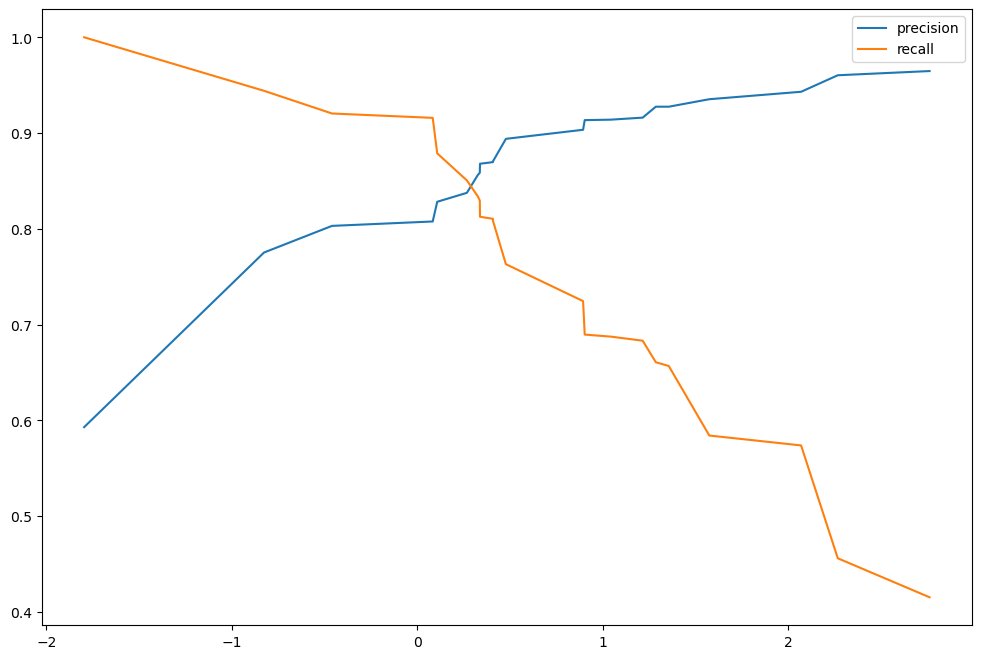

In [114]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, model_gridsearch.decision_function(X_test))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(threshold, precision[:-1], label="precision")
ax.plot(threshold, recall[:-1], label="recall")
ax.legend()
fig.savefig(f"Figures/precision_recall_curve_model_gridsearch.png")

On regarde la courbe pour trouver un threshold acceptable, ie un bon compromis entre recall et précision pour détecter le plus possible de vrais positifs. Ici 0.1 semble être plutôt bien

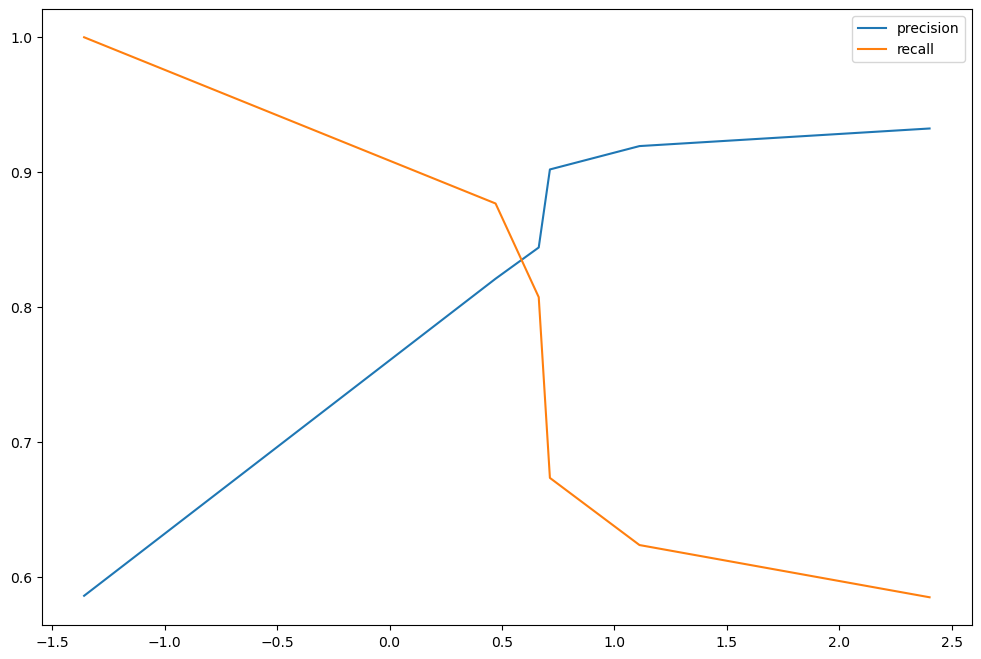

In [82]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, model_randomizedsearch.decision_function(X_test))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(threshold, precision[:-1], label="precision")
ax.plot(threshold, recall[:-1], label="recall")
ax.legend()
fig.savefig(f"Figures/precision_recall_curve_model_randomizedsearch.png")

Ici 0.3 semble être plutôt bien

In [115]:
def model_final(model, X,threshold=0):
    return model.decision_function(X) > threshold

In [116]:
y_pred_gridsearch = model_final(model_gridsearch, X_test, threshold=0.1)
f1_score(y_test, y_pred_gridsearch)

0.8528068365993812

In [122]:
y_pred_randomizedsearch = model_final(model_randomizedsearch, X_test, threshold=0.3)
f1_score(y_test, y_pred_randomizedsearch)

0.8522044822030175

Le modèle obtenu avec la GridSearchCV a un meilleur score F1 pour la nouvelle valeur de seuil.

Streamlit

Documentation Streamlit : https://docs.streamlit.io/

In [ ]:
code = r"""
import streamlit as st
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

st.title("DataTrek")
st.write("Analyse d'un Dataset Kaggle : Indian Student Depression")

data = pd.read_csv(r"Data/Raw/student-depression-dataset.csv")
df = data.copy()
st.write(df)

st.title("Modèles")
st.write("Courbes d'apprentissage des modèles")

st.badge("AdaBoost", color="green")
st.image("Figures/learning_curve_AdaBoost.png")
st.write("Le modèle est très intéressant car les courbes se rapprochent vers 0.87 de score donc valeur assez élevée et pas d'overfitting.")
st.markdown("---")

st.badge("DecisionTree", color="green")
st.image("Figures/learning_curve_DecisionTreeClassifier.png")
st.write("Situation d'overfitting évidente (le modèle connaît par coeur les données d'entraînement).")
st.markdown("---")

st.badge("KNN", color="green")
st.image("Figures/learning_curve_KNN.png")
st.write("Le modèle est moins performant que l'AdaBoost car les courbes ne se rapprochent pas mais pas d'overfitting pour autant.")
st.markdown("---")

st.badge("RandomForest", color="green")
st.image("Figures/learning_curve_RandomForest.png")
st.write("Situation d'overfitting évidente (le modèle connaît par coeur les données d'entraînement).")
st.markdown("---")

st.badge("SVM", color="green")
st.image("Figures/learning_curve_SVM.png")
st.write("Le modèle est intéressant car les courbes semblent se rapprocher vers des valeurs de score élevé mais nécessitant plus de samples. Pas d'overfitting.")
st.markdown("---")

st.title("Optimisation des hyperparamètres de l'AdaBoostClassifier avec GridSearchCV")
grid_best_params = {
    'adaboostclassifier__algorithm': 'SAMME.R',
    'adaboostclassifier__estimator': DecisionTreeClassifier(max_depth=3),
    'adaboostclassifier__learning_rate': 0.001,
    'adaboostclassifier__n_estimators': 200
}
params_df = pd.DataFrame(grid_best_params.items(), columns=["Hyperparamètre", "Valeur"])
st.write("### Hyperparamètres optimaux")
st.table(params_df)

adaboost_grid_classification_report = {
    "precision": [0.84, 0.81, "", 0.82, 0.82],
    "recall": [0.70, 0.90, "", 0.80, 0.82],
    "f1-score": [0.76, 0.85, 0.82, 0.81, 0.81],
    "support": [2300, 3253, 5553, 5553, 5553]
}
index = ["Classe 0", "Classe 1", "Accuracy", "Macro avg", "Weighted avg"]
report_df = pd.DataFrame(adaboost_grid_classification_report, index=index).round(2)

st.write("### Rapport de classification")
st.table(report_df)

st.write("### Interprétations : ")
st.write("**Accuracy globale** : Le modèle classe correctement 78% des cas totaux.")
st.markdown("---")
st.write("**Classe 0** (pas en dépression) : ")
st.write("**Précision** : Elle permet de connaître le nombre de prédictions positives bien effectuées. En d'autres termes, c'est le nombre de positifs bien prédits (Vrais Positifs) divisé par l'ensemble des positifs prédits (Vrais Positifs + Faux Positifs).")
st.latex(r'''
\text{Précision} = \frac{\text{Vrais Positifs}}{\text{Vrais Positifs} + \text{Faux Positifs}}
''')
st.write("Donc parmi les prédictions 'pas en dépression', 84% sont correctes.")
st.write("**Rappel** : Le recall permet de savoir le pourcentage de positifs bien prédits par notre modèle. En d'autres termes, c'est le nombre de positifs bien prédits (Vrais Positifs) divisé par l'ensemble des positifs (Vrais Positifs + Faux Négatifs).")
st.latex(r'''
\text{Recall} = \frac{\text{Vrais Positifs}}{\text{Vrais Positifs} + \text{Faux Négatifs}}
''')
st.write("Donc le modèle identifie 70% des vrais 'non dépressifs'.")
st.write("**F1-score** : Ici, le F1 Score est ce qu'on appelle la moyenne harmonique. C'est une « moyenne » adaptée aux calculs de taux/pourcentage (ici le recall et la précision).")
st.latex(r'''
\text{F1-score} = 2 \times \frac{\text{Recall} \times \text{Précision}}{\text{Recall} + \text{Précision}}
''')
st.write("Ici F1-score = 0.76, équilibre entre précision et rappel relativement bon mais possibilité d'améliorations si on réduisait le nombre de faux négatifs")
st.markdown("---")
st.write("**Classe 1** (en dépression) : ")
st.write("**Précision** : Parmi les prédictions 'pas en dépression', 81% sont correctes.")
st.write("**Rappel** : Le modèle identifie 90% des vrais 'non dépressifs'.")
st.write("**F1-score** : 0.85, bonne performance du modèle.")
st.markdown("---")

st.title("Optimisation des hyperparamètres de l'AdaBoostClassifier avec RandomizedSearchCV")
grid_best_params = {
    'adaboostclassifier__algorithm': 'SAMME.R',
    'adaboostclassifier__estimator': DecisionTreeClassifier(max_depth=2),
    'adaboostclassifier__learning_rate': 0.001,
    'adaboostclassifier__n_estimators': 100
}
params_df = pd.DataFrame(grid_best_params.items(), columns=["Hyperparamètre", "Valeur"])
st.write("### Hyperparamètres optimaux")
st.table(params_df)

adaboost_grid_classification_report = {
    "precision": [0.86, 0.75, "", 0.80, 0.79],
    "recall": [0.56, 0.93, "", 0.75, 0.78],
    "f1-score": [0.68, 0.83, 0.78, 0.75, 0.7],
    "support": [2300, 3253, 5553, 5553, 5553]
}
index = ["Classe 0", "Classe 1", "Accuracy", "Macro avg", "Weighted avg"]
report_df = pd.DataFrame(adaboost_grid_classification_report, index=index).round(2)

st.write("### Rapport de classification")
st.table(report_df)

st.write("### Interprétations : ")
st.write("**Accuracy globale** : Le modèle classe correctement 78% des cas totaux.")
st.markdown("---")
st.write("**Classe 0** (pas en dépression) : ")
st.write("**Précision** : Parmi les prédictions 'pas en dépression', 86% sont correctes.")
st.write("**Rappel** : Le modèle identifie 75% des vrais 'non dépressifs'.")
st.write("**F1-score** : 0.68, équilibre entre précision et rappel relativement bon mais possibilité d'améliorations si on réduisait le nombre de faux négatifs")
st.markdown("---")
st.write("**Classe 1** (en dépression) : ")
st.write("**Précision** : Parmi les prédictions 'pas en dépression', 75% sont correctes.")
st.write("**Rappel** : Le modèle identifie 93% des vrais 'non dépressifs'.")
st.write("**F1-score** : 0.83, bonne performance du modèle.")
st.markdown("---")
"""

with open("app_streamlit.py", "w") as f:
    f.write(code)


Exécuter dans la console : streamlit run app_streamlit.py